# **Name: Aditya Mishra | Roll Number: 21013 | Computer Vision Course Project**

This notebook contains the script for YOLOv11 model implementation on pothole detection. The dataset is available on [Roboflow-workspace](https://universe.roboflow.com/adityamishraworkspace/pothole-detection-yl3on/model/2).

Go to the [GitHub](https://github.com/adityamishraaaa/DSE312-CV.git) repository for more details.

## **Install YOLO11 via Ultralytics**

In [1]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [2]:
import torch
import os
from IPython.display import Image, clear_output

In [3]:
!pip install roboflow

In [4]:
from roboflow import Roboflow
os.environ["DATASET_DIRECTORY"] = "/content/datasets"
rf = Roboflow(api_key="BzOe7v4hxfAKn7QcoMrq")
project = rf.workspace("adityamishraworkspace").project("pothole-detection-yl3on")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/Pothole-Detection-2 in yolov11:: 100%|██████████| 3192/3192 [00:00<00:00, 4789.72it/s]


In [5]:
!ls

datasets


In [6]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

100% 18.4M/18.4M [00:00<00:00, 71.9MB/s]
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Pothole-Detection-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

In [7]:
!ls runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1732076253.4f9a6413694f.4085.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch7830.jpg  weights
P_curve.png					    train_batch7831.jpg
PR_curve.png					    train_batch7832.jpg


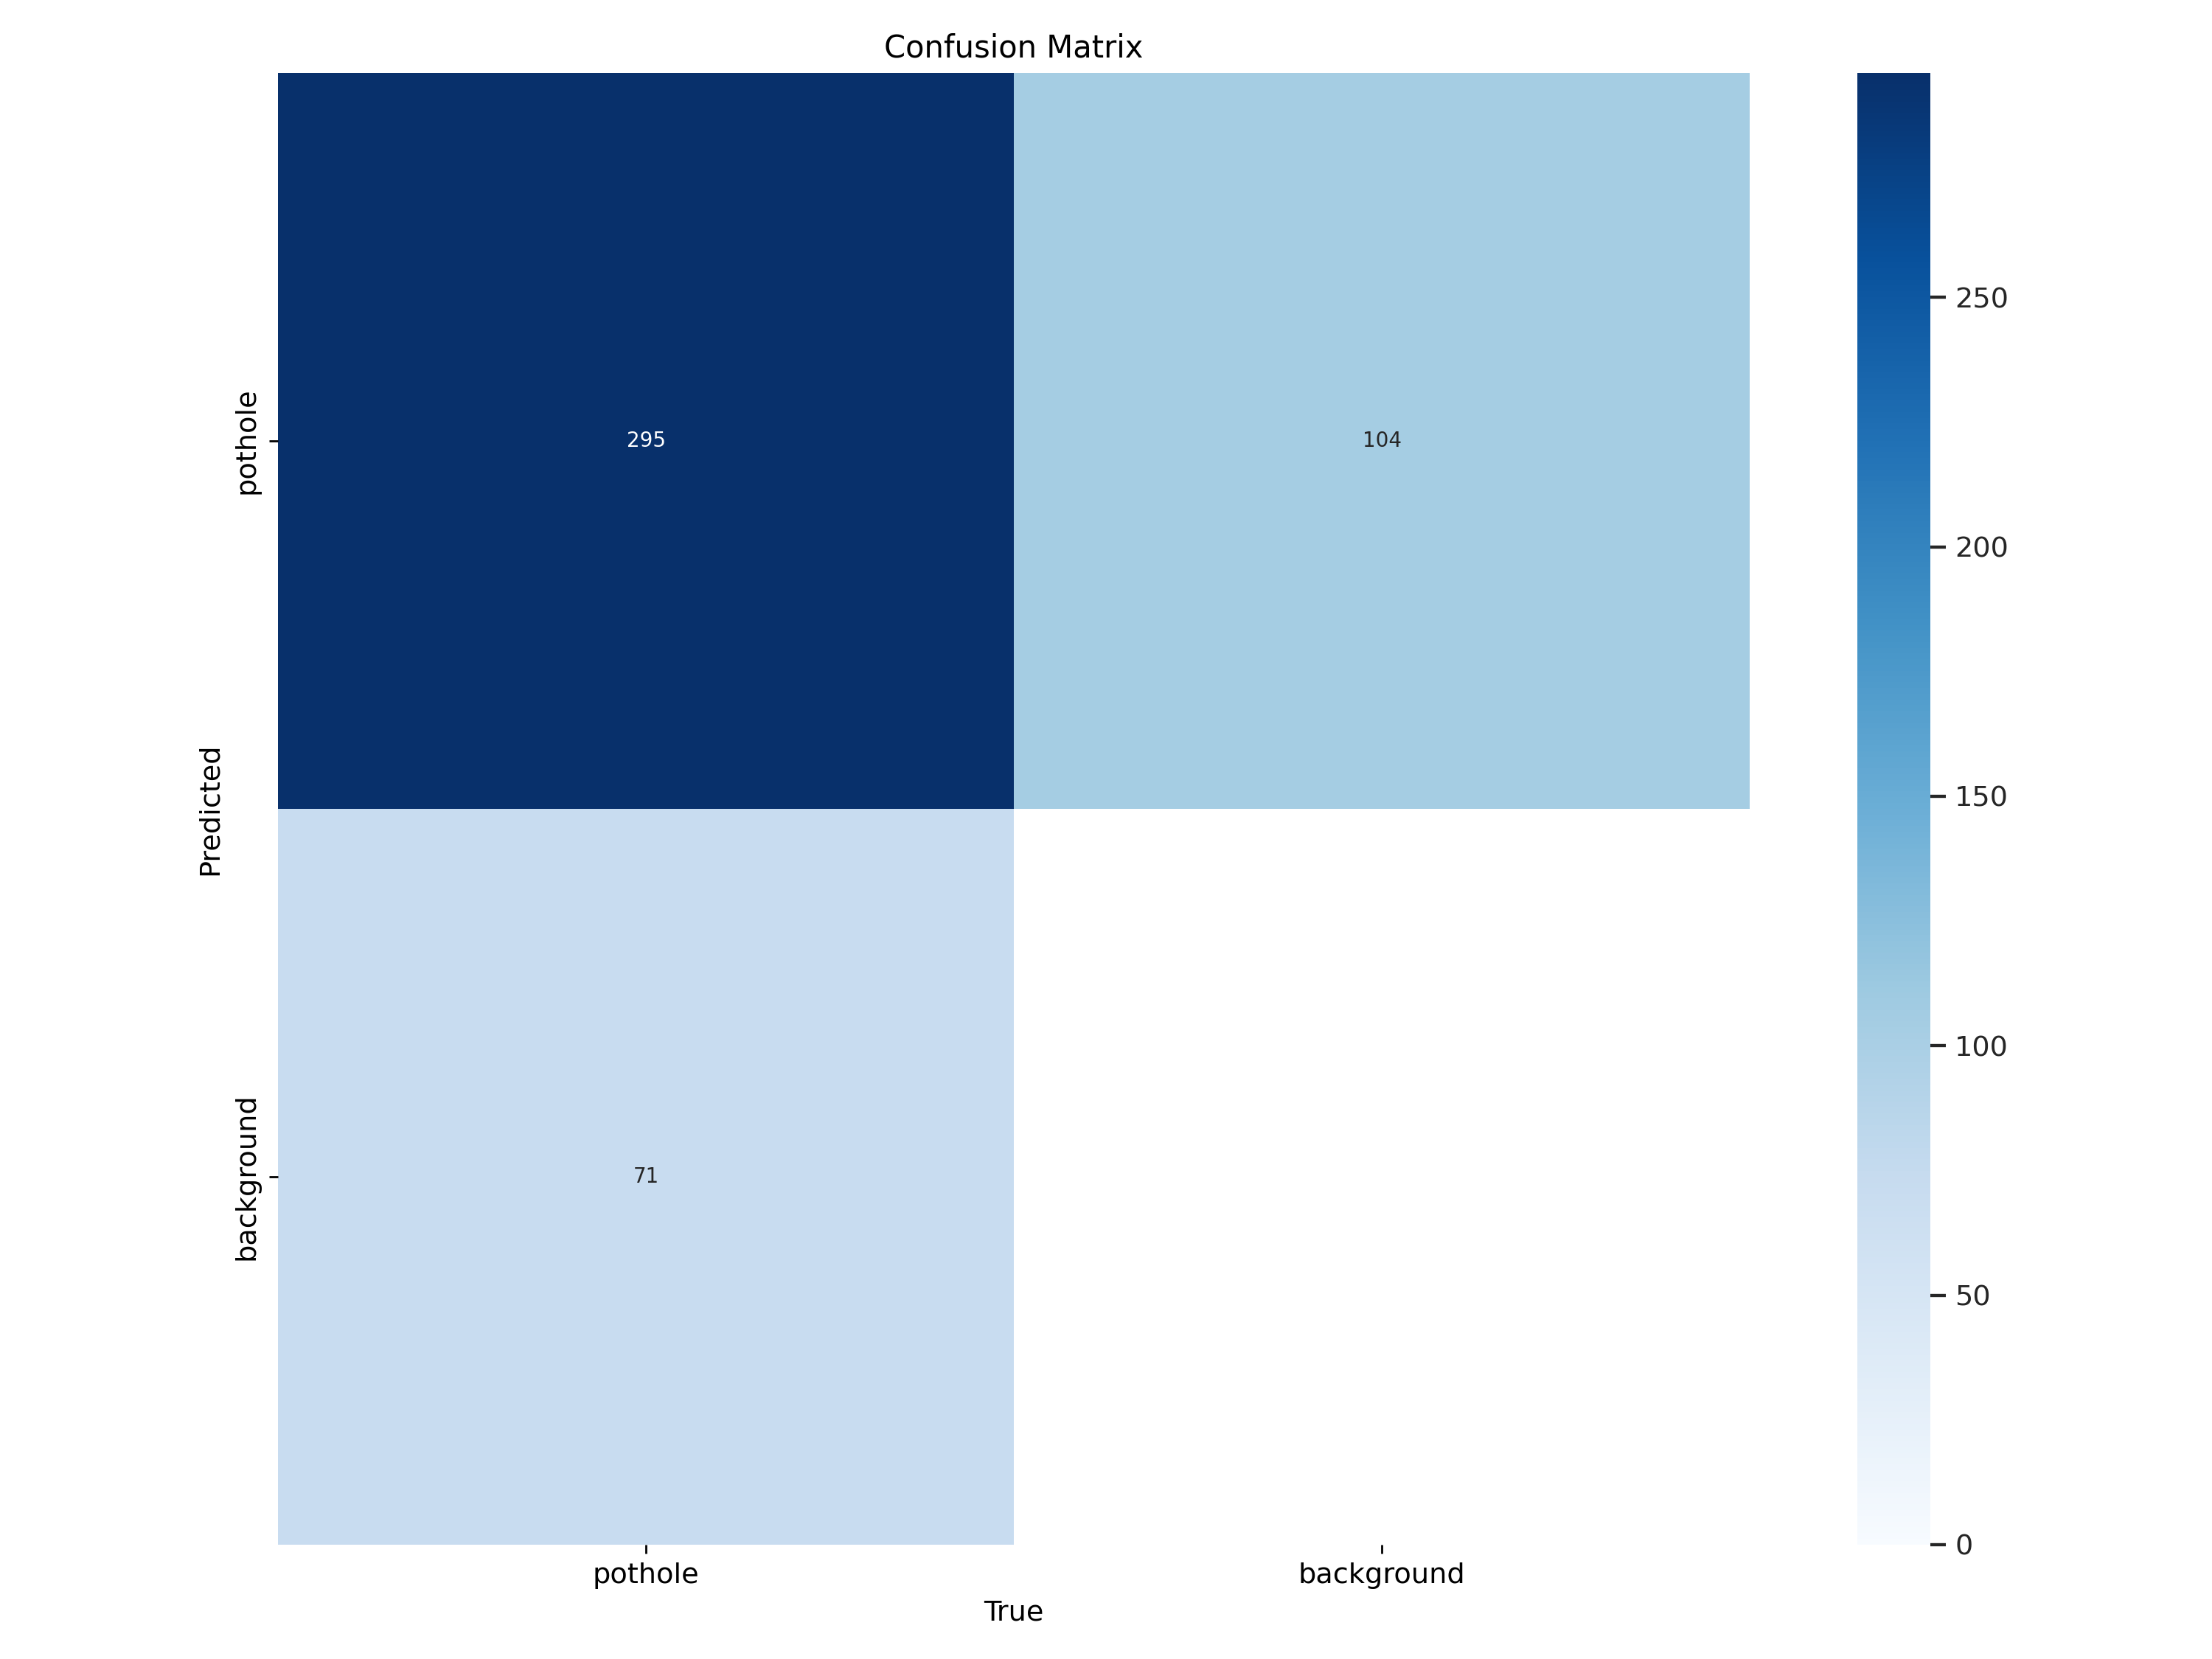

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/results.png', width=1200)

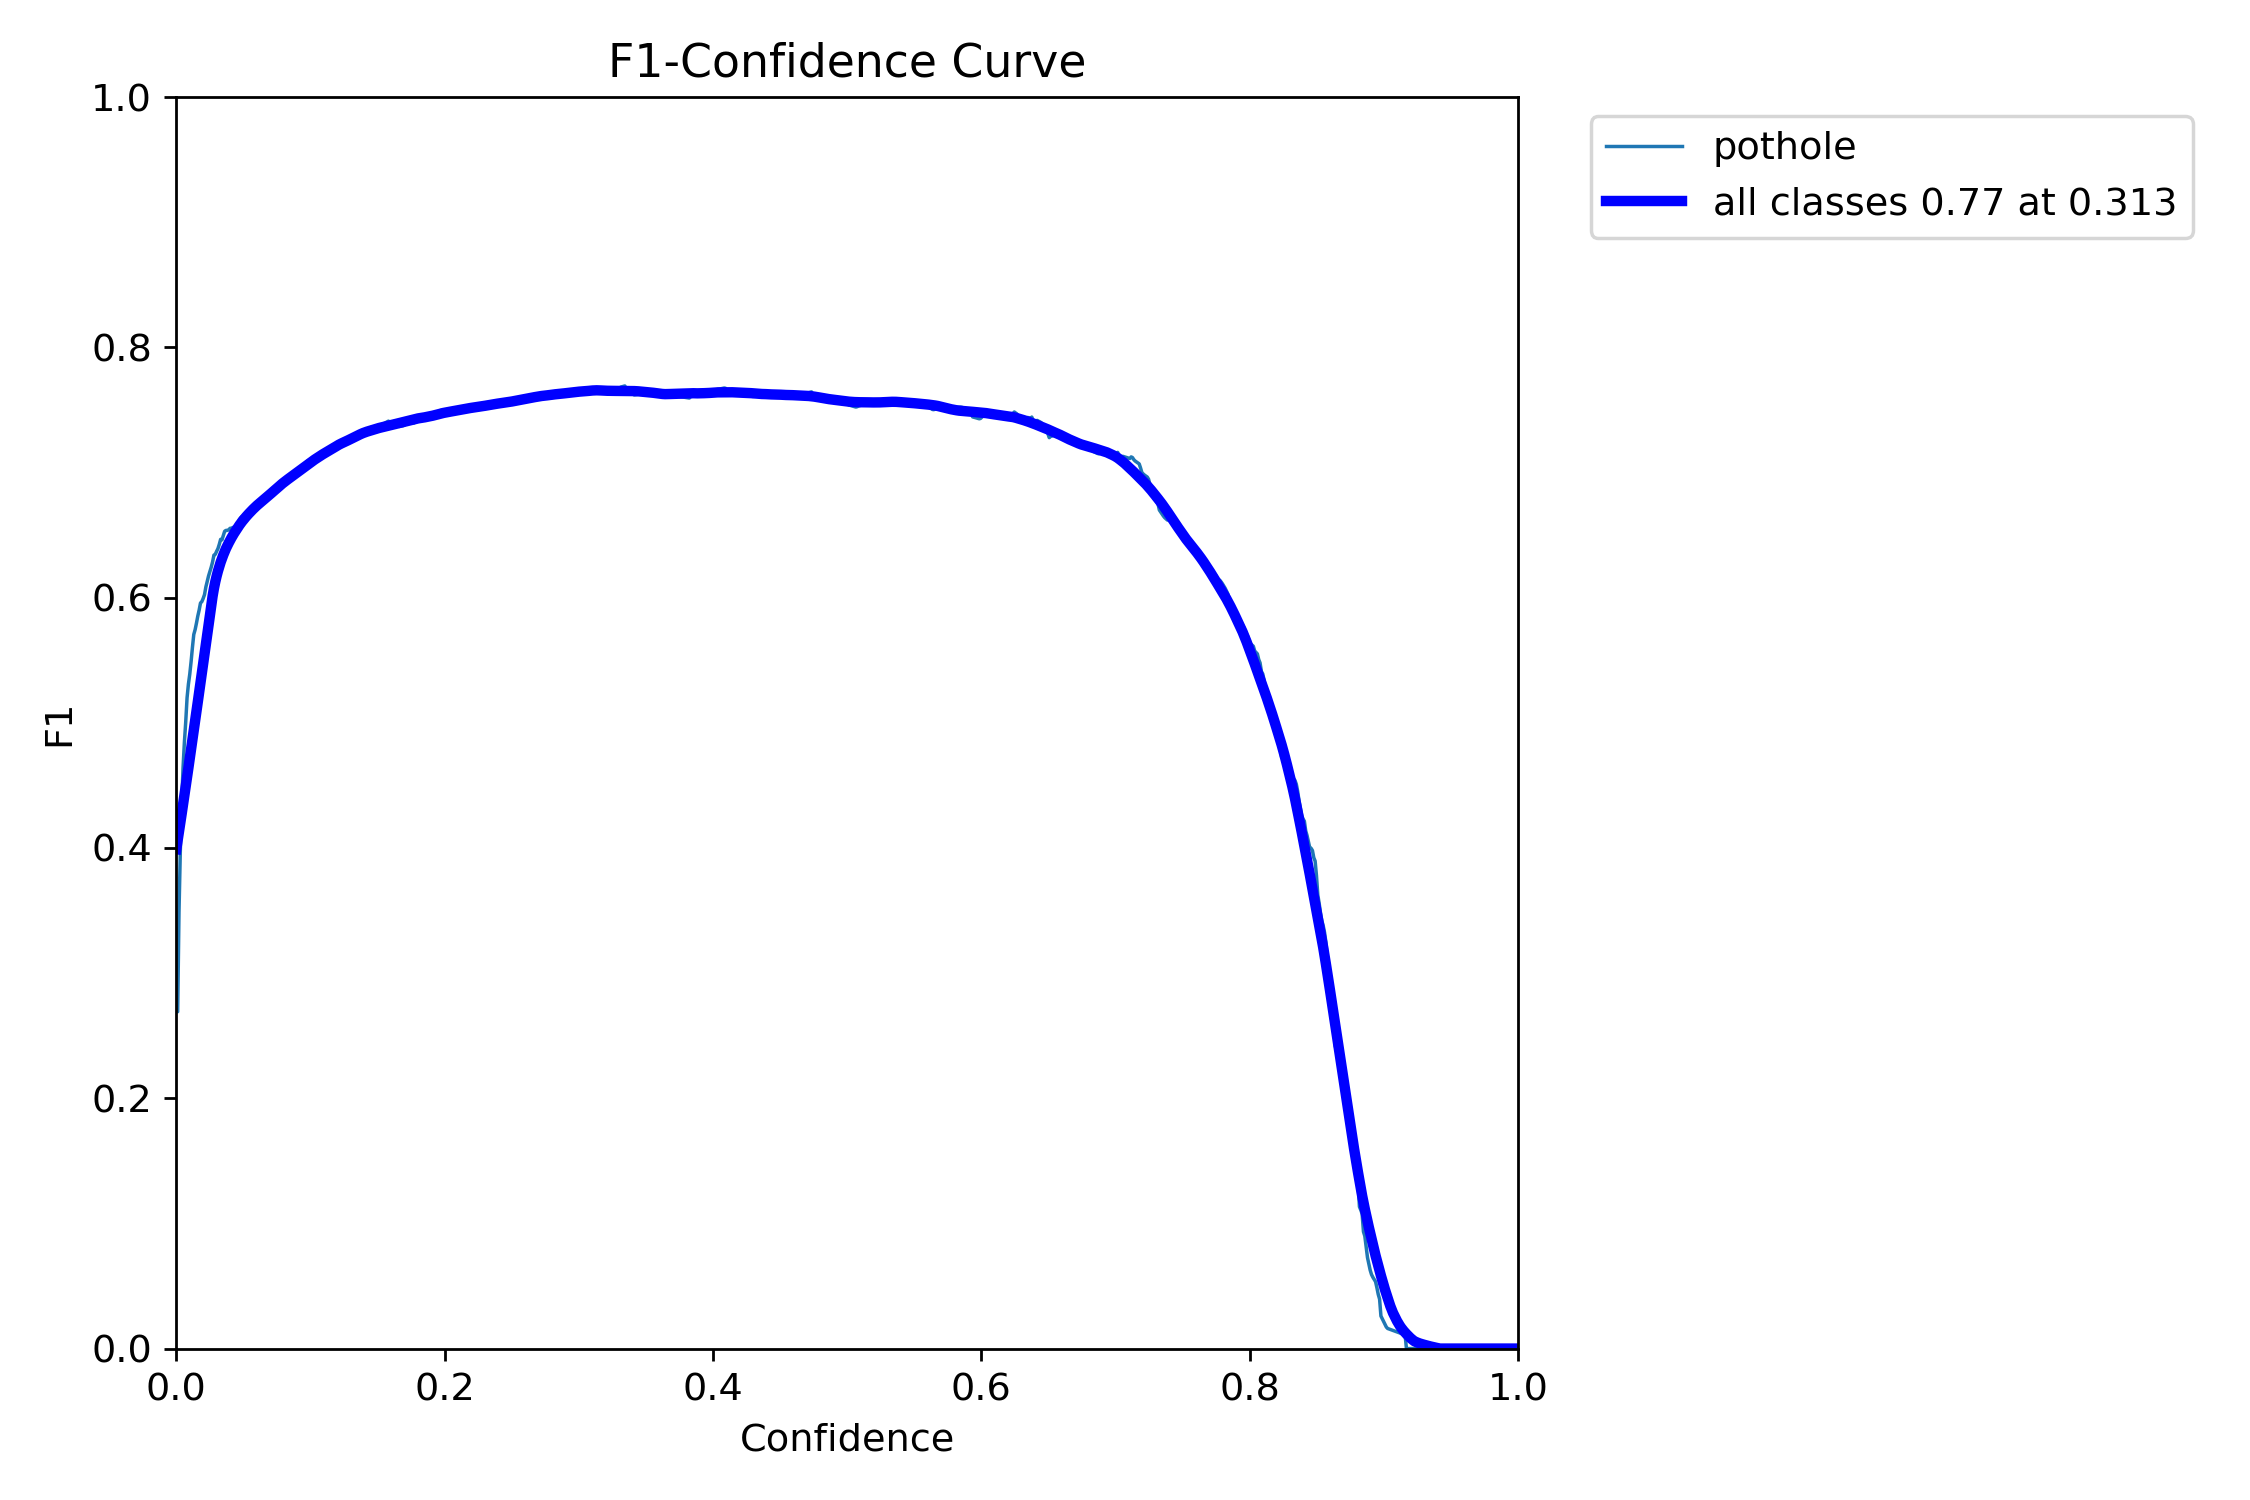

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/F1_curve.png', width=600)

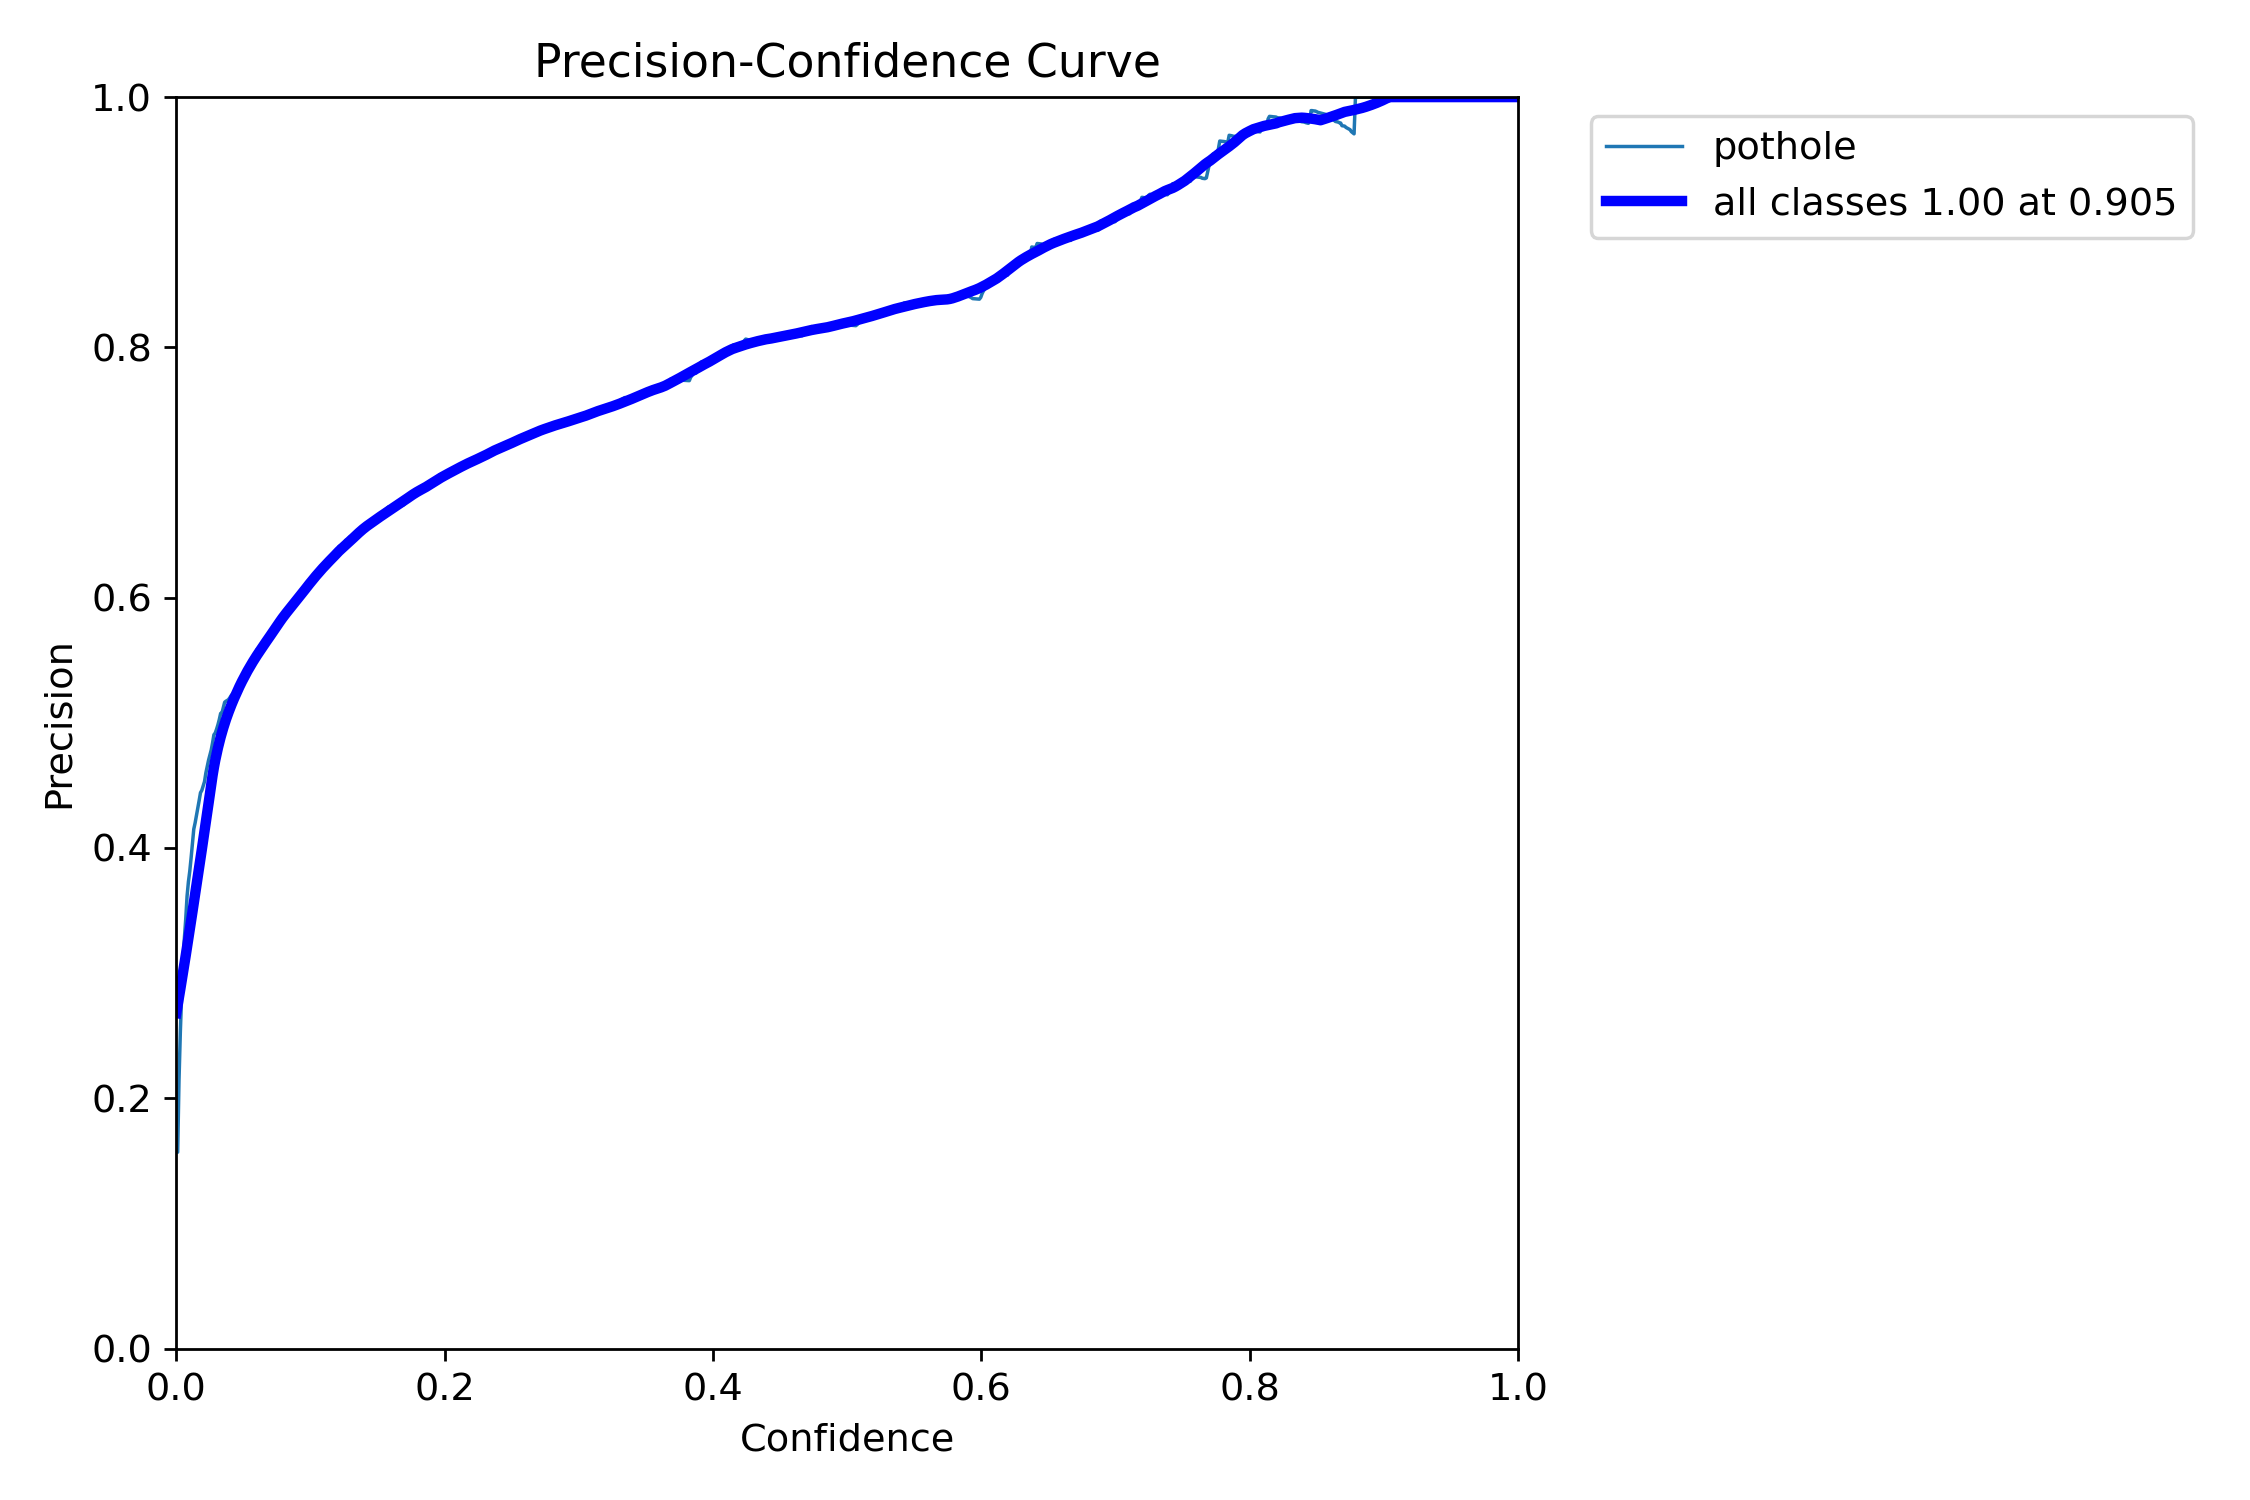

In [14]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/P_curve.png', width=600)

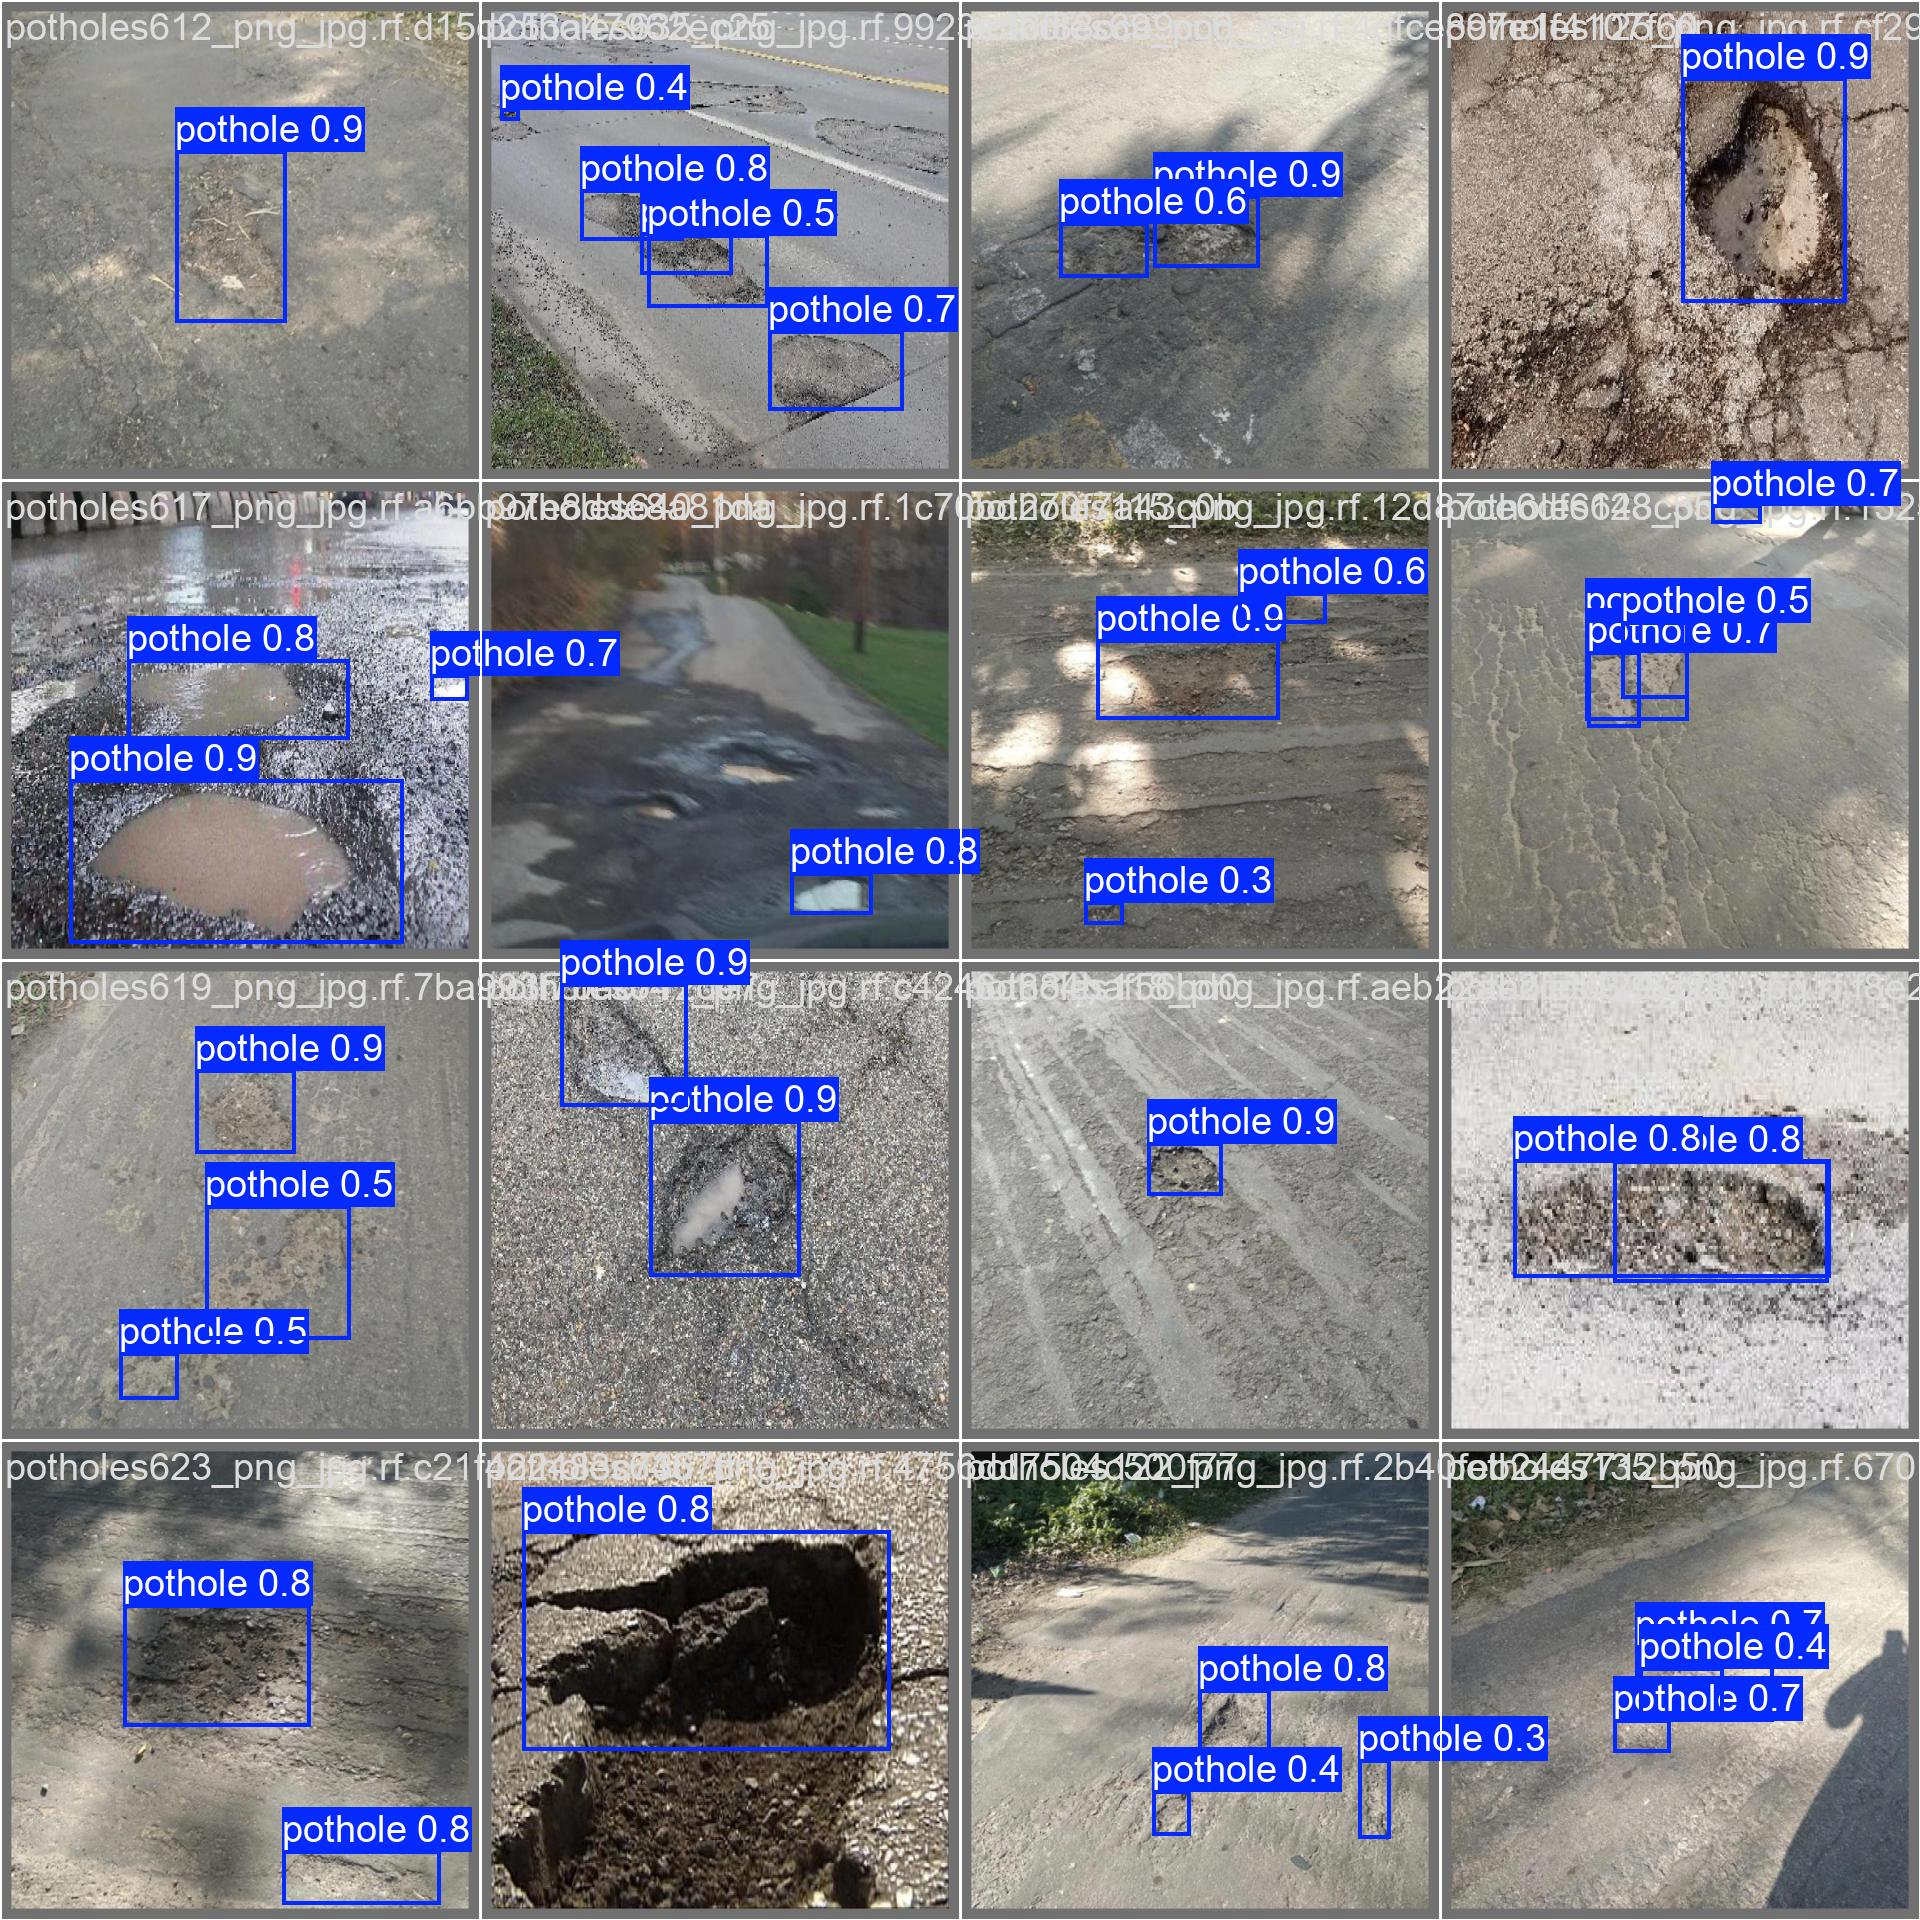

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/val_batch0_pred.jpg', width=1200)

## **Validate fine-tuned model**

In [15]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Pothole-Detection-2/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:03<00:00,  2.46it/s]
                   all        133        366      0.767      0.763      0.826      0.513
Speed: 1.8ms preprocess, 12.1ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## **Inferences**

In [16]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/67 /content/datasets/Pothole-Detection-2/test/images/potholes117_png_jpg.rf.c348131f102648398146e6d730469359.jpg: 640x640 2 potholes, 20.6ms
image 2/67 /content/datasets/Pothole-Detection-2/test/images/potholes120_png_jpg.rf.61a08383ce540da7e8337b64e46fac3f.jpg: 640x640 4 potholes, 18.1ms
image 3/67 /content/datasets/Pothole-Detection-2/test/images/potholes124_png_jpg.rf.c372dceba5d794c159bafb35730b888d.jpg: 640x640 1 pothole, 17.5ms
image 4/67 /content/datasets/Pothole-Detection-2/test/images/potholes137_png_jpg.rf.4ddfc69e86d5d8c4c7877cc8ed378442.jpg: 640x640 1 pothole, 19.0ms
image 5/67 /content/datasets/Pothole-Detection-2/test/images/potholes143_png_jpg.rf.9dc76d0fec46d9e834a20942b364c4fb.jpg: 640x640 3 potholes, 17.1ms
image 6/67 /content/datasets/Pothole-Detection-2/test/images/potholes175_png_jpg.rf.727956

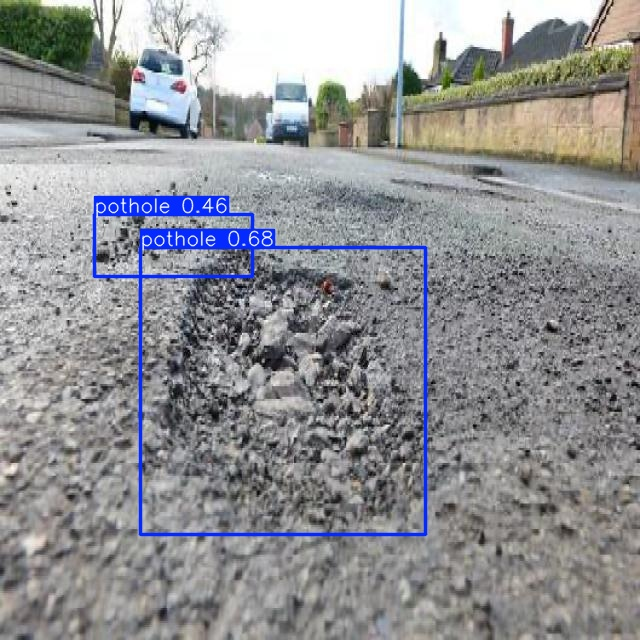

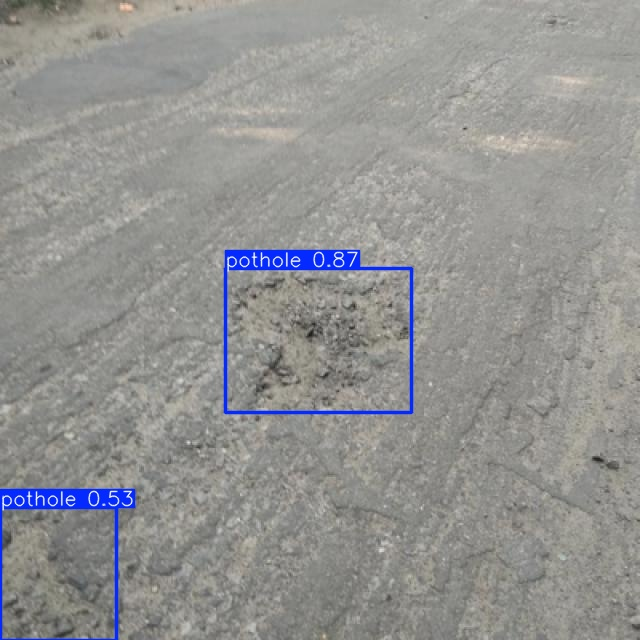

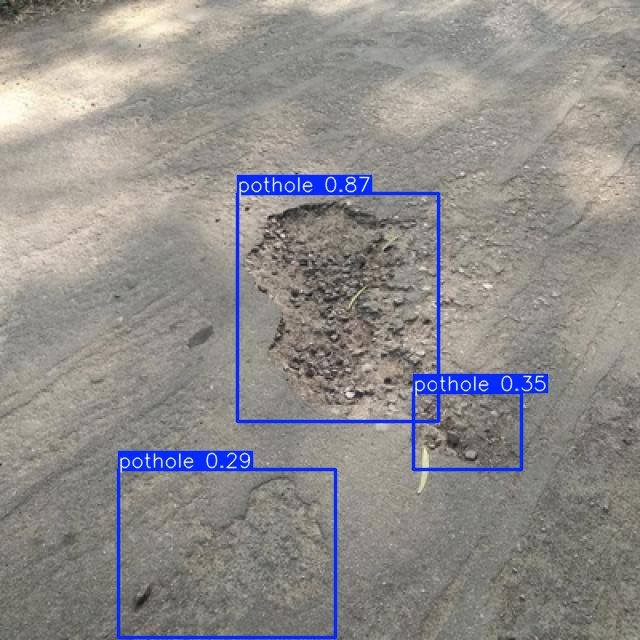

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [19]:
import shutil
from google.colab import files  # Use this only if you're in Google Colab

# Compress the folder 'runs' into a .zip file
shutil.make_archive("runs", "zip", "runs")

# Download the .zip file
files.download("runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Deployment**

In [21]:
project.version(4).deploy(model_type="yolov11", model_path=f"runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


Running inference on potholes117_png_jpg.rf.c348131f102648398146e6d730469359.jpg


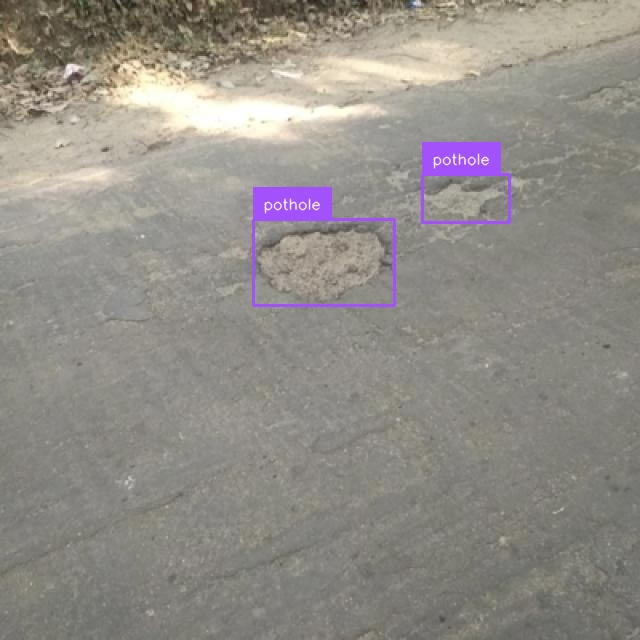

Running inference on potholes391_png_jpg.rf.9b132b82bedc2c4beea9b7c50d549835.jpg


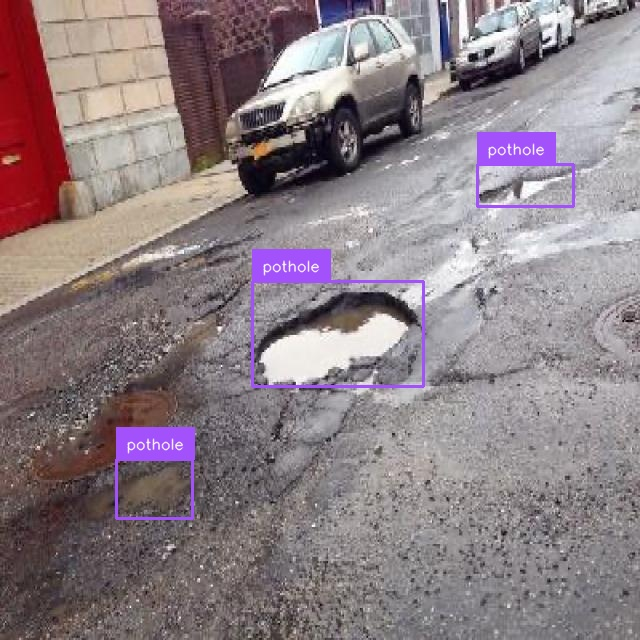

Running inference on potholes576_png_jpg.rf.d47382c2b70e400f94e96bc195e84045.jpg


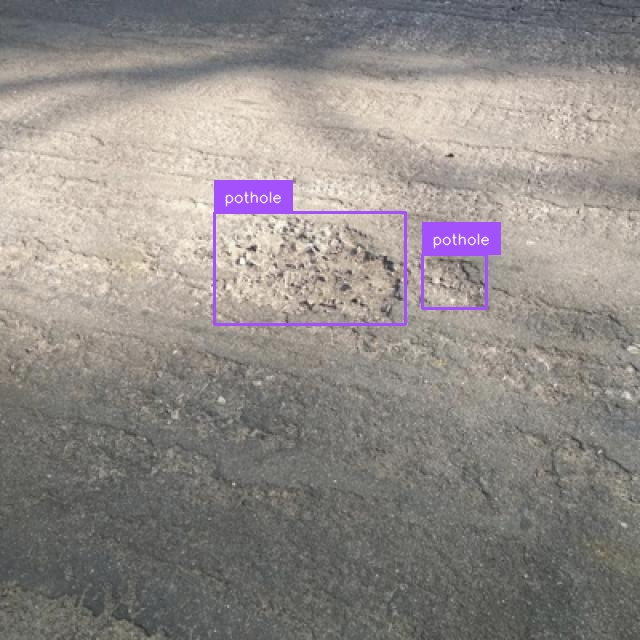

Running inference on potholes240_png_jpg.rf.cce2ed7e52ab793413ab61123c593ecd.jpg


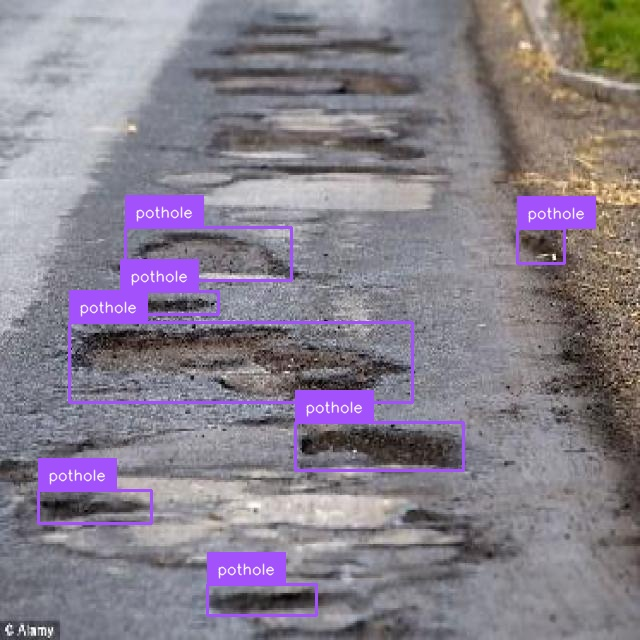

In [26]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + "4"
model = inference.get_model(model_id, 'BzOe7v4hxfAKn7QcoMrq')

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.4, overlap=30)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)